In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn.linear_model as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Exercise 1: Adding Ridge and Lasso Regression 

a) Write your own code for the Ridge method (see chapter 3.4 of Hastie et al., equations (3.43) and (3.44)) and compute the parametrization for different values of $\lambda$. Compare and analyze your results with those from exercise 3. Study the dependence on $\lambda$ while also varying the strength of the noise in your expression for y(x).

In [37]:
# Data
x = np.random.rand(100) #an array of 100 unordered uniform random numbers from 0 to 1
x.sort()
y = 2 + 5 * x**2 + 2 * np.random.randn(100) # quadratic of x plus normally distributed noise

# Constants
n = x.size
p = 3
I = np.eye(p)

# Design matrix
X = np.empty((n, p))
for i in range(p):
    X[:, i] = x**i # Row 1 becomes [1, x_0, x_0^2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regression methods
def OLS(X, y):
    beta = np.linalg.inv(X.T @ X) @ X.T @ y # beta = (X.T X)^-1 X.T y
    return beta

def ridge(X, y, lmda):
    beta = np.linalg.inv(X.T @ X + lmda * I) @ X.T @ y
    return beta

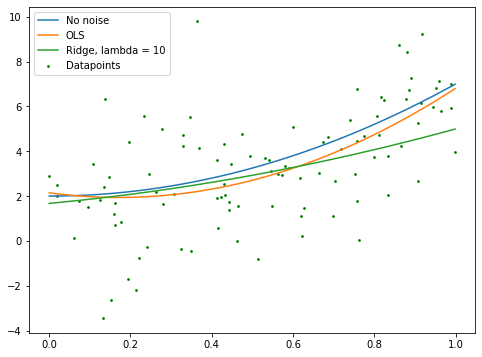

In [38]:
# Plotting of results
beta_OLS = OLS(X_train, y_train)
lmda = 10
beta_ridge = ridge(X_train, y_train, lmda)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color = "green", s = 3, label="Datapoints")
plt.plot(x, 2 + 5 * x**2, label="No noise")
plt.plot(x, X @ beta_OLS, label = "OLS")
plt.plot(x, X @ beta_ridge, label = f"Ridge, lambda = {lmda}")
plt.legend()
plt.show()

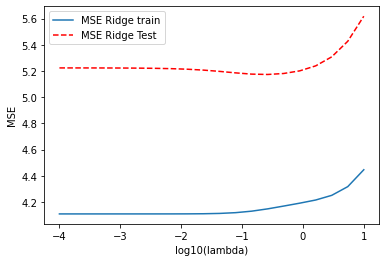

In [39]:
# MSE as function of lambda
nlambdas = 20
MSEPredict = np.zeros(nlambdas)
MSETrain = np.zeros(nlambdas)
lambdas = np.logspace(-4, 1, nlambdas)
for i in range(nlambdas):
    lmda = lambdas[i]
    beta_ridge = ridge(X_train, y_train, lmda)
    
    ytildeRidge = X_train @ beta_ridge
    MSETrain[i] = mean_squared_error(y_train, ytildeRidge)
    
    ypredictRidge = X_test @ beta_ridge
    MSEPredict[i] = mean_squared_error(y_test, ypredictRidge)
    
plt.figure()
plt.plot(np.log10(lambdas), MSETrain, label = 'MSE Ridge train')
plt.plot(np.log10(lambdas), MSEPredict, 'r--', label = 'MSE Ridge Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

b) Repeat the above but using the functionality of Scikit-Learn. Compare your code with the results from Scikit-Learn. Remember to run with the same random numbers for generating x and y. 

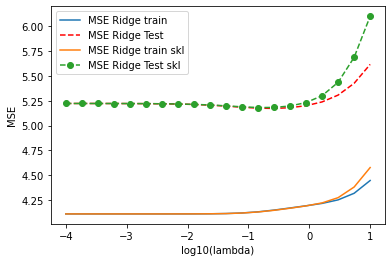

In [42]:
# Previous code!
nlambdas = 20
MSEPredict = np.zeros(nlambdas)
MSETrain = np.zeros(nlambdas)
lambdas = np.logspace(-4, 1, nlambdas)
for i in range(nlambdas):
    lmda = lambdas[i]
    beta_ridge = ridge(X_train, y_train, lmda)
    
    ytildeRidge = X_train @ beta_ridge
    MSETrain[i] = mean_squared_error(y_train, ytildeRidge)
    
    ypredictRidge = X_test @ beta_ridge
    MSEPredict[i] = mean_squared_error(y_test, ypredictRidge)
    
plt.figure()
plt.plot(np.log10(lambdas), MSETrain, label = 'MSE Ridge train')
plt.plot(np.log10(lambdas), MSEPredict, 'r--', label = 'MSE Ridge Test')

# Same code using skl
nlambdas = 20
MSEPredict = np.zeros(nlambdas)
MSETrain = np.zeros(nlambdas)
lambdas = np.logspace(-4, 1, nlambdas)
for i in range(nlambdas):
    lmda = lambdas[i]
    clf_ridge = skl.Ridge(alpha=lmda).fit(X_train, y_train)
    
    ytildeRidge = clf_ridge.predict(X_train)
    MSETrain[i] = mean_squared_error(y_train, ytildeRidge)
    
    ypredictRidge = clf_ridge.predict(X_test)
    MSEPredict[i] = mean_squared_error(y_test, ypredictRidge)
    

plt.plot(np.log10(lambdas), MSETrain, label = 'MSE Ridge train skl')
plt.plot(np.log10(lambdas), MSEPredict, 'o--', label = 'MSE Ridge Test skl')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


np.random.seed(2018)
n = 50
maxdegree = 5
# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
TestError = np.zeros(maxdegree)
TrainError = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    clf = model.fit(x_train_scale,y_train)
    y_fit = clf.predict(x_train_scaled)
    y_pred = clf.predict(x_test_scaled) 
    polydegree[degree] = degree
    TestError[degree] = np.mean( np.mean((y_test - y_pred)**2) )
    TrainError[degree] = np.mean( np.mean((y_train - y_fit)**2) )

plt.plot(polydegree, TestError, label='Test Error')
plt.plot(polydegree, TrainError, label='Train Error')
plt.legend()
plt.show()

ValueError: X has 1 features, but this StandardScaler is expecting 3 features as input.